# Project 4 Project
## Recommendations of Movies
![First Picture](pictures/Movie Recommendation Pict.jpg)

## Overview 
There are more than millions of movies made since first introducted. The normal person however have limited time to watch movies in their freetime more than ever. In order to help consumers save time and money and companies give comsumers the best experience, recommendations are made to make selection easier. To make these recommendation, we will be using a dataset of roughly 10,000 movie entries inorder to predict that a user would rate a given movie higher with those with users with similar reviews on said movie. By comparing similar users and movie ratings, we should be able to recommend movies accurately.   

## Buiness Problem
Streaming services have made movies more accessable to user to watch movie conviently. With thousands of movies, users can feel overwelmned and more likely than not, be watching movies that they dont like. To help user experience and more likely use their services, a good recommendation system is used to help guide the user to the correct movie. 

## Data Understanding
The movies dataset have the list of movies with the name, Id and their genres.
The rating dataset have users reviews on movies and their ratings that the user gives. 
The tags dataset have users give tags for the movies they have watched. 

The data was provided by Grouplens. 

In [1]:
### Read all the dataset and load them in with proper names ###
### Links were not used for this project ###

import pandas as pd
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# links = pd.read_csv('ml-latest-small/links.csv') 

### Exploration Information
* There are 9,742 movies in the dataset
* There are 100,836 ratings and 610 users 
* There are 58 users that make up the 3,683 tags added
* Genres are separated by | if there are more than one


In [2]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## Data Preperations
When exploring the dataset, none of the data was missing and other than the timestamps, all columns were usable. 

In [4]:
### Remove the timestamp column ### 
ratings.drop('timestamp', axis = 1, inplace = True)

In [5]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

### Reader to use surprise libraries and create training set and testset ### 
reader = Reader()
data = Dataset.load_from_df(ratings,reader)
trainset, testset = train_test_split(data, test_size=0.3, random_state= 69)

In [6]:
from surprise.prediction_algorithms import knns
from surprise import accuracy

## Modeling 

### Baseline Model with KNN Baseline 
A baseline model to compare the model if it is improving. 
KnnBasic, a memory based method was used with cosine similarity comparison. 

In [7]:
sim_cos = {"name": "cosine", "user_based": True}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
basic_pred = basic.test(testset)
print(accuracy.rmse(basic_pred))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9819
0.9818952607403942


#### Baseline Evaulation
The rating are roughly 1 point off which is pretty large considering that the range of ratings are from 1 to 5
This is the first model where we will see if we can imporve on it. We are focused on user to user similarities for this project. 

## Improved Models 
Grid search were used for multiple different algorithm to determine the best model to use for recommendations.

In [9]:
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline

### Memory Based Methods 

#### KnnBasic

In [23]:
sim_cosine = {"name": "cosine", "user_based": True}

basic_pearson = knns.KNNBasic(sim_options=sim_cosine, random_state = 69)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))   

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9819
0.9818952607403942


#### Knn With Means

In [24]:
knn_means = knns.KNNWithMeans(sim_options=sim_cosine, random_state = 69)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9103
0.910278017316939


#### Knn Baseline 

In [26]:
knn_baseline = knns.KNNBaseline(sim_options=sim_cosine, random_state = 69)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8883
0.8882986936389531


The KnnBaseline performed the best out of all the models for the memory based algorithm. 

### Model Based Method

#### SVD algoritm
Find the best parameters for SVD algorithms

In [8]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV

# params = {'n_factors': [20, 50, 100],
#          'reg_all': [0.02, 0.05, 0.1],
#           'lr_all': [.001, .002, .003, .004, .005],
#          'random_state':[69]
#          }
# g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1)
# g_s_svd.fit(data)
# g_s_svd.best_params

#  {'rmse': {'n_factors': 100,
#   'reg_all': 0.05,
#   'lr_all': 0.005,
#   'random_state': 69},
#  'mae': {'n_factors': 100,
#   'reg_all': 0.05,
#   'lr_all': 0.005,
#   'random_state': 69}}

In [10]:
best_svd = SVD(n_factors= 20, reg_all = 0.1, random_state = 69)
best_svd.fit(trainset)
svd_pred = best_svd.test(testset)
print(accuracy.rmse(svd_pred))

RMSE: 0.8794
0.8793716488892641


### KnnBaseline vs SVD
Both KnnBaseline and SVD performed the best when modelling so we need to determine which will be used for the final model. A gridsearch is used to see if there is a better combination of parameters to use. 

In [14]:
# clf = knns.KNNBaseline(sim_options=sim_pearson)
# params = {'k':[10, 20, 30, 40, 50],
#           'min_k': [1, 2, 3, 4],
#           'random_state':[69]
#          }
# g_s_baseline = GridSearchCV(KNNBaseline,param_grid=params,n_jobs=-1)
# g_s_baseline.fit(data)
# g_s_baseline.best_params

In [29]:
sim_pearson = {"name": "pearson", "user_based": True}
knn_baseline = knns.KNNBaseline(k = 30, min_k = 4,sim_options=sim_pearson, random_state = 69)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8776
0.8776019532148854


**Knn Baseline** perform **slightly better** than the SVD method so we will use that for our model.

In [33]:

def user_top_5(user_id, model):
    """Take in a model and a user Id and output the predicted rating for the movies
    ______________________________
    Input - user_id (int) 
    Output - list (list) 
    ______________________________
    Will only accept users in the model since data is needed for the model to work.
    List output is sorted before returning.
    Will not suggest movies already seen. 
    """
    
    if(user_id not in ratings['userId'].unique()):
        return "Invalid User"
    seen_movies = ratings['movieId'].loc[ratings['userId'] == user_id].values
    new_movies = [movie for movie in movies.movieId.values if movie not in seen_movies]
    predicted_ratings = []
    for movie in new_movies:
        predicted_ratings.append((movie, model.predict(user_id, movie)[3]))
    list_of_movies = sorted(predicted_ratings, key= lambda x: x[1], reverse= True)
    return list_of_movies

def past_movies(user_id):
    """ Function locate all the movies watched by the user and return a dataframe of them. 
    ______________________________
    Input - user_id (int) 
    Output - past_movies (Dataframe) 
    ______________________________
    """
    user_movies = ratings.loc[ratings['userId'] == user_id]
    ids = [ID for ID in user_movies['movieId'].values]
    past_movies = movies[['title', 'genres']].loc[movies['movieId'].isin(ids)]
    return past_movies

def id_title(ids):
    return movies['movieId']

In [30]:
movie_df = past_movies(1)
list_genres = movie_df.genres.values

In [18]:
genres = {}
for movie in list_genres: 
    separated_genre = movie.split(sep= '|')
    for genre in separated_genre:
        if genres.get(genre) != None:
            genres[genre] += 1
        else:
            genres[genre] = 1
sorted(genres.items(), key= lambda x : x[1], reverse= True)

[('Action', 90),
 ('Adventure', 85),
 ('Comedy', 83),
 ('Drama', 68),
 ('Thriller', 55),
 ('Fantasy', 47),
 ('Crime', 45),
 ('Children', 42),
 ('Sci-Fi', 40),
 ('Animation', 29),
 ('Romance', 26),
 ('War', 22),
 ('Musical', 22),
 ('Mystery', 18),
 ('Horror', 17),
 ('Western', 7),
 ('Film-Noir', 1)]

In [19]:
ratings.loc[ratings['movieId'].isin(testset['movieId'].values)]

TypeError: list indices must be integers or slices, not str

## Item to Item Comparisons
There are a fair amount of movies that the system recommends. 
In order to help filter more of the movies out, we will use the data provided by the movie dataset. 
Speciafially, we will use the genre columns to see if we can help narrow down the movies even further.

In [31]:
### Train another model but item to item comparison instead ###

sim_pearson = {"name": "pearson", "user_based": False}
knn_baseline_item = knns.KNNBaseline(k = 30, min_k = 4,sim_options=sim_pearson, random_state = 69)
knn_baseline_item.fit(trainset)
predictions = knn_baseline_item.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8890
0.8889934058130716


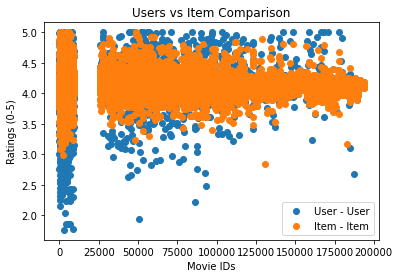

In [40]:
import matplotlib.pyplot as plt
user_user = user_top_5(1, knn_baseline)
item_item = user_top_5(1, knn_baseline_item)
x_1 = [ID[0] for ID in user_user]
x_2 = [ID[0] for ID in item_item]
y_1 = [ID[1] for ID in user_user]
y_2 = [ID[1] for ID in item_item]

plt.title('Users vs Item Comparison')
plt.ylabel('Ratings (0-5)')
plt.xlabel('Movie IDs')
plt.scatter(x_1, y_1, label = 'User - User');
plt.scatter(x_2, y_2, label = 'Item - Item');
plt.legend();

### Comparison Analysis
From the predicted ratings, we can see that the model based on the similarities of the users tend to **dislike older added films** and progressive gets **better over time**. This could be due to more users have seened old films and thus more of a spread or that quality have gone up for newer movies. 
The item comparison, shows similarities in movies that users watched to see if they would like another movie. Its worth noting that most movies **didn't score lower than 3** and may appear to believe that most movies are the similar to one another which make sense due to similar genres and troopes

## Next Step
We created two model, one recommends movie based of the users and another from the movies. 
To help narrow down the movies to recommend, we will use both list to consider the best movies to recommend the user. 

In [58]:
counter = 0
top_movie_id = []
for movie in item_item:
    for item in user_user[0:10]:
        if movie[0] == item[0]:
            top_movie_id.append(movie[0])
        if len(top_movie_id) == 5:
            break

In [59]:
movies.loc[(movies['movieId'].isin(top_movie_id[0:5]))]

,movieId,title,genres
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
413,475,In the Name of the Father (1993),Drama
585,720,Wallace & Gromit: The Best of Aardman Animatio...,Adventure|Animation|Comedy
596,741,Ghost in the Shell (Kôkaku kidôtai) (1995),Animation|Sci-Fi
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War


In [ ]:
list_1 = sorted(user_user

In [ ]:
set(list_1[0:10]) == set(list_2[0:10])
    

In [43]:
top_movie_id

[(318, 5),
 (7008, 4.3725654687351225),
 (112421, 4.365100285094778),
 (73344, 4.363744661831989),
 (5919, 4.356639489567101)]